# Init

https://www.kaggle.com/code/leifuer/intro-to-pytorch-loading-image-data 

In [16]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
import torch
from torchvision import datasets, transforms

In [6]:
data_path    = "data/intel_image/" 
raw_img_path = data_path + "raw_data/"

# Load the image data

In [ ]:
transform = transforms.Compose([transforms.Resize(224),
                                transforms.ToTensor()])

In [9]:
test_data = datasets.ImageFolder(raw_img_path + 'seg_test', transform=transform)

In [52]:
train_data = datasets.ImageFolder(raw_img_path + 'seg_train', transform=transform)

In [53]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True) # TODO: use the ImageFolder dataset to create the DataLoader
test_loader = torch.utils.data.DataLoader(test_data, batch_size=32, shuffle=True) # TODO: use the ImageFolder dataset to create the DataLoader

In [58]:
print (type (train_data))
print (f'Length of Train data & Test data = {len (train_data)} & {len (test_data)}' )
print (f'Shape = {train_data[0][0].shape}') # 3, 224, 224 (RGB, 224x224)

<class 'torchvision.datasets.folder.ImageFolder'>
Length of Train data & Test data = 14034 & 3000
Shape = torch.Size([3, 224, 224])


In [59]:
print (type (train_loader))
print (len (train_loader))

<class 'torch.utils.data.dataloader.DataLoader'>
439


In [60]:
# Run this to test your data loader
images, labels = next(iter(train_loader))

In [61]:
print (len (labels)) # 32 images as in batch size
print (len (images))

32
32


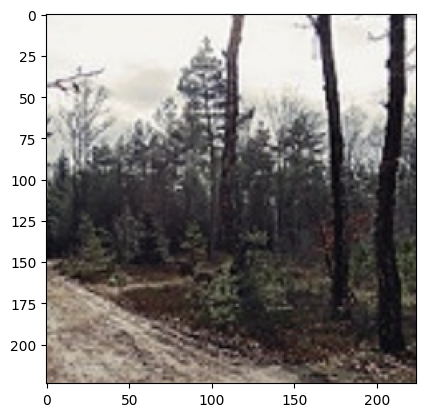

In [62]:
plt.imshow (images[0].permute(1, 2, 0))  # permute to change the order of the dimensions from (C, W, H) to (W, H, C)

In [63]:
print (labels[0])
print (labels[0].item())

tensor(1)
1


In [32]:
img_label_mapping = {0: 'buildings', 1: 'forest', 2: 'glacier', 3: 'mountain', 4: 'sea', 5: 'street'}

In [43]:
def print_15_images (df_images, df_labels, title='Intel Images'):
    n = 15
    nrow = 3 
    ncol = int (n/nrow)
    fig, ax = plt.subplots (nrows=nrow, ncols=ncol, figsize=(20,10))
    fig.suptitle(title)
    for i in range(n):
        # idx = np.random.randint(0, len(df_image))

        _row = i//ncol
        _col = i%ncol
        ax[_row,_col].imshow(df_images[i].permute(1, 2, 0))
        ax[_row,_col].set_title(img_label_mapping[df_labels[i].item()] )
        ax[_row,_col].axis('off')

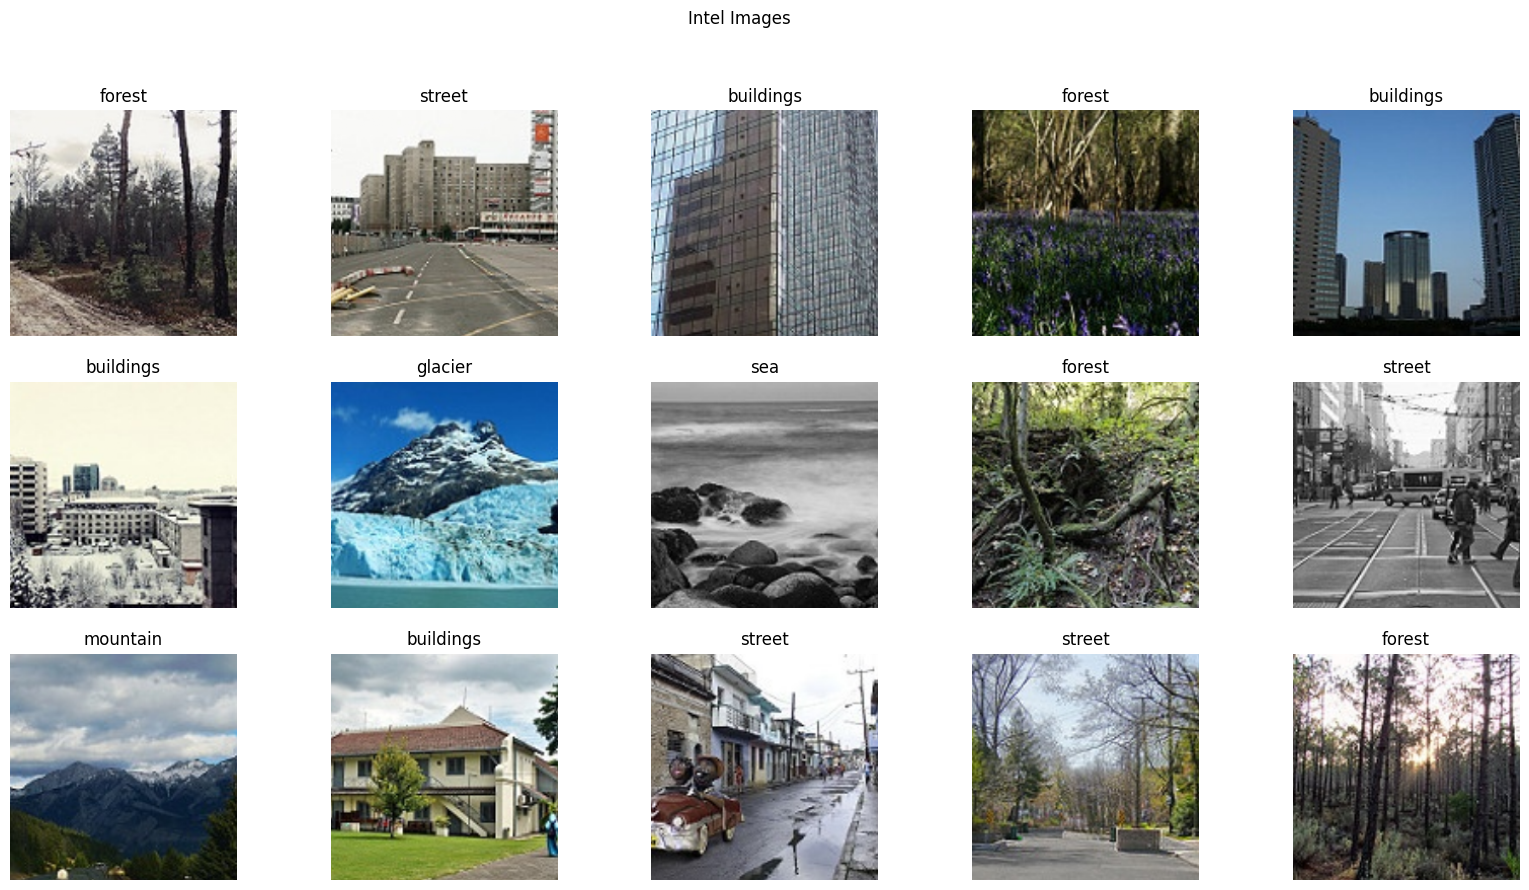

In [64]:
print_15_images (images, labels, title='Intel Images')

In [ ]:
# from torch.utils.data.dataset import random_split

In [71]:
len_train_data = round (len (train_data) * 0.7)
len_val_data = len (train_data) - len_train_data
print (len_train_data, len_val_data)

9824 4210


In [72]:
# Split the Dataset
train_set, val_set = torch.utils.data.random_split(train_data, [len_train_data, len_val_data])
# train_data2, val_data = random_split(dataset, [1200, 600])

In [74]:
print (len (train_set), len (val_set))
print (type (train_set), type (val_set))

9824 4210
<class 'torch.utils.data.dataset.Subset'> <class 'torch.utils.data.dataset.Subset'>


In [75]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=32, shuffle=True) # TODO: use the ImageFolder dataset to create the DataLoader
valid_loader = torch.utils.data.DataLoader(val_set, batch_size=32, shuffle=True) # TODO: use the ImageFolder dataset to create the DataLoader

In [76]:
# Run this to test your data loader
images, labels = next(iter(train_loader))

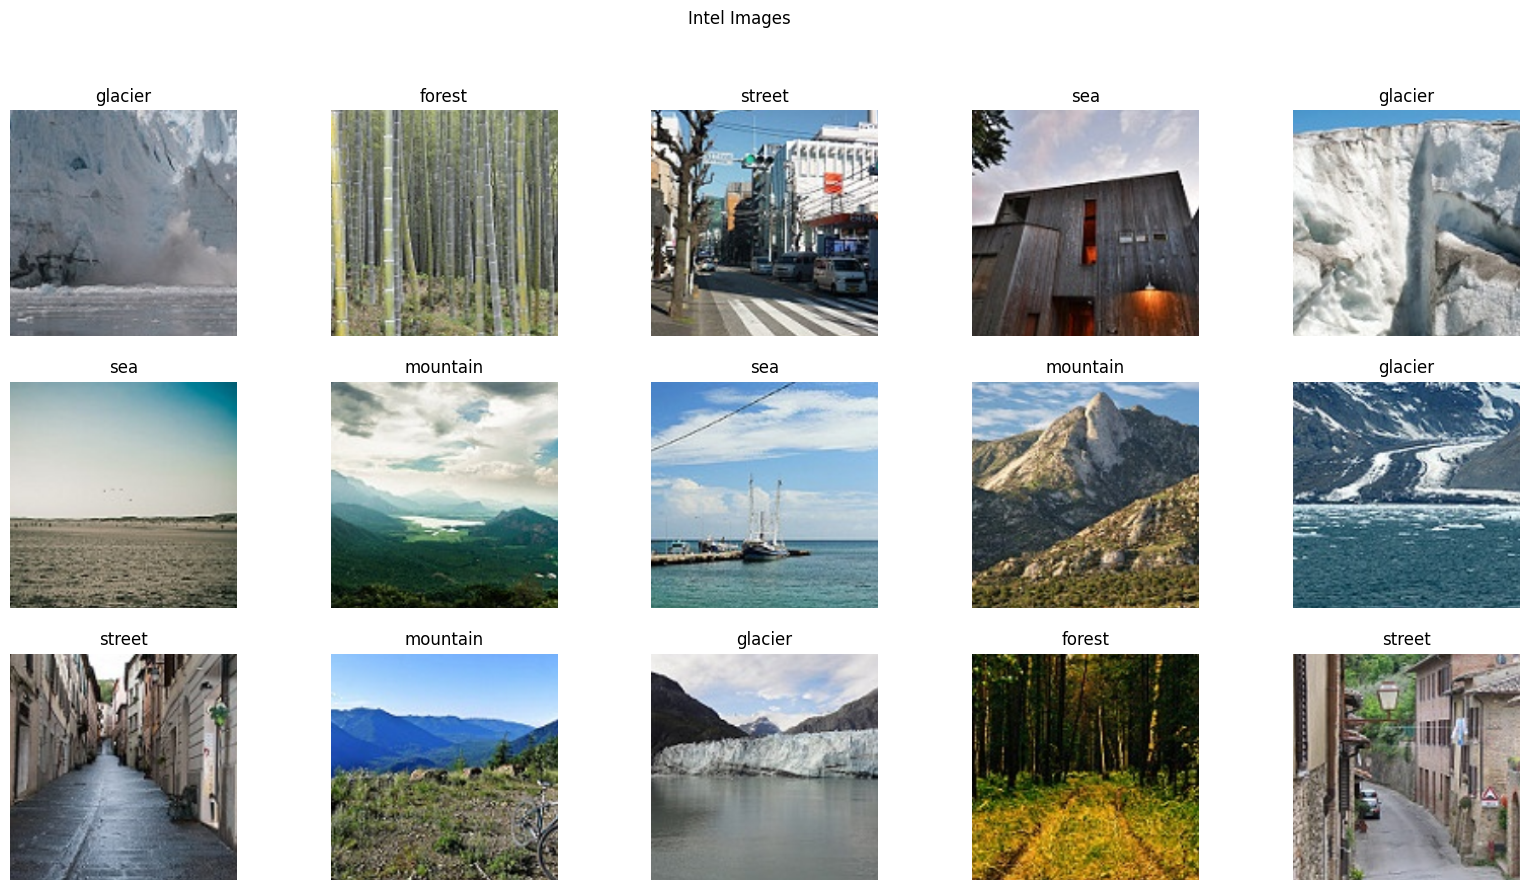

In [77]:
print_15_images (images, labels, title='Intel Images')